### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [217]:
data = pd.read_csv('data/coupons.csv')

In [218]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [220]:
print(data.shape)
data.isna().sum()

(12684, 26)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [221]:
# Print unique values for each column to identify problematic data.
def print_columns_unique_values(df):
    for column in df.columns:
        print(f"Column Name: {column}, DataType: {df[column].dtype}")
        print(df[column].unique())
        print("\n")

3. Decide what to do about your missing data -- drop, replace, other...

In [222]:
# Create a copy of the original data.
working_data = data

# There are 12,684 rows and working_data['cars'] has 12,576 nan values. Drop the column
working_data = working_data.drop(columns=['car'])

working_data.isna().sum()


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [223]:
# The columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restarant20To50 has nan. These rows represent less than 5% of the total 12,684 rows. Drop these rows

working_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)

working_data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [224]:
# Convert columns to appropriate data types

working_data['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [225]:
# There are two string values in age 50plus and below21. Convert these to int values 51 and 18 respectively.


working_data['age'] = working_data['age'].replace({'50plus': '51', 'below21': '18'})

working_data['age'].info()

# Convert age to numeric
working_data['age'] = pd.to_numeric(working_data['age'], errors='coerce')

working_data.isna().sum()

<class 'pandas.core.series.Series'>
Index: 12079 entries, 22 to 12683
Series name: age
Non-Null Count  Dtype 
--------------  ----- 
12079 non-null  object
dtypes: object(1)
memory usage: 188.7+ KB


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [226]:
''' Convert income to int datatype. For this case the format of the row is "${min_amount} - ${max_amount}" with special cases like
"Less than $12500" and "$100000 or More". I will use the min_amount for regular cases and remove the dollar sign, for special cases, "Less than $12500" I will replace this value with 12500, and  "$100000 or More" will be replaced with 100000.
'''

def clean_income(income):
    if income == "Less than $12500":
        return 12_500
    elif income == "$100000 or More":
        return 100_000
    else:
        parsed_income = income.split("-")[0].replace("$", "")
        return int(parsed_income)

working_data['income'] = working_data['income'].apply(clean_income)

working_data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [227]:
# working_data.expiration.unique()

# Current values are "1d" and "2h", convert to 24 h
def convert_to_hours(value):
    if value == '1d':
        return 24
    elif value == '2h':
        return 2
    elif isinstance(value, (int,np.integer)):
        return value
    else:
        return np.nan

working_data['expiration'] = working_data['expiration'].apply(convert_to_hours)
working_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [228]:
working_data.isna().sum()


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [229]:

def to_24h_numeric(time):
    dt = datetime.strptime(time, '%I%p')
    return dt.hour

working_data['time'] = working_data['time'].apply(to_24h_numeric)
working_data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,14,Restaurant(<20),24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10,Carry out & Take away,2,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,18,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7,Coffee House,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [230]:
working_data.describe()

,temperature,time,expiration,age,has_children,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,13.812567,14.312278,32.456909,0.408478,47865.096448,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,5.408619,10.921896,10.584966,0.491573,30566.324078,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,7.000000,2.000000,18.000000,0.000000,12500.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,7.000000,2.000000,21.000000,0.000000,25000.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,14.000000,24.000000,31.000000,0.000000,37500.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,18.000000,24.000000,41.000000,1.000000,75000.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,22.000000,24.000000,51.000000,1.000000,100000.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
print_columns_unique_values(working_data)

Column Name: destination, DataType: object
['No Urgent Place' 'Home' 'Work']


Column Name: passanger, DataType: object
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


Column Name: weather, DataType: object
['Sunny' 'Rainy' 'Snowy']


Column Name: temperature, DataType: int64
[55 80 30]


Column Name: time, DataType: int64
[14 10 18  7 22]


Column Name: coupon, DataType: object
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


Column Name: expiration, DataType: int64
[24  2]


Column Name: gender, DataType: object
['Male' 'Female']


Column Name: age, DataType: int64
[21 46 26 31 41 51 36 18]


Column Name: maritalStatus, DataType: object
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


Column Name: has_children, DataType: int64
[0 1]


Column Name: education, DataType: object
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']




4. What proportion of the total observations chose to accept the coupon?



In [232]:

# Use the mean multiply by 100 to get percentage
proportion_accepted = working_data['Y'].mean() * 100

print(f'Total proportion of accepted coupon: {proportion_accepted:.2f}%')

Total proportion of accepted coupon: 56.93%


5. Use a bar plot to visualize the `coupon` column.

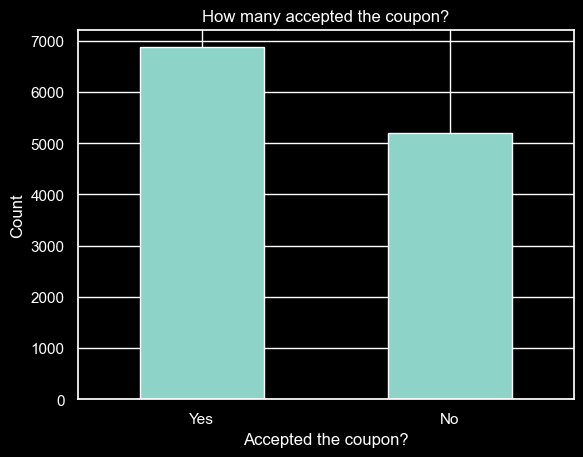

In [233]:
# Change 0/1 to No/Yes for better label visualization
working_data['Y'].map({0:'No', 1:'Yes'}).value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Accepted the coupon?')
plt.ylabel("Count")
plt.title("How many accepted the coupon?")
plt.show()

6. Use a histogram to visualize the temperature column.

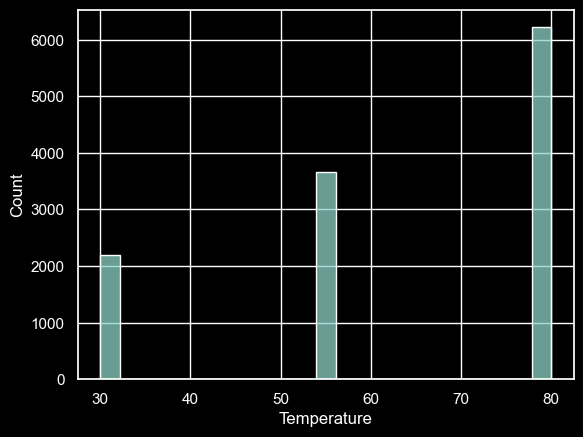

In [234]:
sns.histplot(working_data, x='temperature')
plt.xlabel("Temperature")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [235]:
# Get the coupon with value Bar
bar_df = working_data.query('coupon == "Bar"')
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,18,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,18,Bar,24,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,22,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,22,Bar,2,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,18,Bar,2,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [236]:
# Get the Bar coupon that were acccepted
bar_accepted = bar_df.query('Y == 1')

# Divide the number of accepted bar coupons by total bar coupons to get the proportion
proportion_bar_accepted = (bar_accepted.shape[0]/ bar_df.shape[0]) * 100

print(f'Proportion of accepted bar coupons: {proportion_bar_accepted:.2f}%')

Proportion of accepted bar coupons: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [237]:
# Show different values in the 'Bar' column for accepted bar coupons
# print(bar_accepted['Bar'].value_counts())

less_than_3 = bar_accepted.query('Bar in ["never", "less1", "1~3"]')
more_than_3 = bar_accepted.query('Bar in ["4~8", "gt8"]')

acceptance_rate_less_than3 = (less_than_3.shape[0] / bar_df.shape[0]) * 100
acceptance_rate_more_than3 = (more_than_3.shape[0] / bar_df.shape[0]) * 100

print(f"Acceptance rate for drivers who went to a bar 3 or fewer times a month: {acceptance_rate_less_than3:.2f}%")
print(f"Acceptance rate for driver who wen more than 3: {acceptance_rate_more_than3:.2f}%")



Acceptance rate for drivers who went to a bar 3 or fewer times a month: 33.51%
Acceptance rate for driver who wen more than 3: 7.68%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [238]:
# Query the drivers that goes to bar more than once and age > 25
over25_more_than1= bar_accepted.query('Bar in ["1~3", "4~8", "gt8"] and age > 25')
acceptance_rate_over25_more_than1 = (over25_more_than1.shape[0] / bar_df.shape[0]) * 100
# Negate the above query to get all others
all_others = bar_accepted.query('~(Bar in ["1~3", "4~8", "gt8"] and age > 25)')
acceptance_rate_all_others = (all_others.shape[0] / bar_df.shape[0]) * 100

print(f"Acceptance rate > once/month and > 25 years: {acceptance_rate_over25_more_than1:.2f}")
print(f"Acceptance rate all other: {acceptance_rate_all_others:.2f}")



Acceptance rate > once/month and > 25 years: 14.53
Acceptance rate all other: 26.66


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [239]:

bar_more_than1 = bar_accepted.query('Bar in ["1~3", "4~8", "gt8"] and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')

acceptance_rate_not_kids = ( bar_more_than1.shape[0] / bar_df.shape[0] ) * 100

print(f"Acceptance rate: {acceptance_rate_not_kids:.2f}%")

Acceptance rate: 19.65%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [240]:
bar_more_than = bar_accepted.query('(Bar in ["1~3", "4~8", "gt8"] and '
                                   'passanger != "Kid(s)" and maritalStatus != "Widowed") or '
                                   '(Bar in ["1~3", "4~8", "gt8"] and age < 30) or '
                                   '(RestaurantLessThan20 in ["4~8", "1~3"]) and income < 50_000')

acceptance_rate_ =  (bar_more_than.shape[0] / bar_accepted.shape[0] ) * 100

print(f"Acceptance rate: {acceptance_rate_:.2f}%")

Acceptance rate: 65.23%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on above analysis, I can deduced the following conclusions about customer behaviour on bar coupon acceptance

### 1. Overall Acceptance Trends
*   **General vs. Specific**:

 The overall coupon acceptance rate for the entire dataset is **56.93%**, while bar coupons have a significantly lower acceptance rate of **41.19%**. This suggests that bar coupons depend more on individual lifestyle and habits compared to more universal coupons like "Carry out" or "Restaurant (<$20)".

### 2. The Influence of Habitual Behavior
*   **Frequency is Key**: Drivers who visit bars at least once a month are much more likely to accept the coupon.
*   **The "Regular" Effect**: In Question 3, we observed that while the majority of total acceptances come from those who visit bars 3 or fewer times a month (33.51% of total bar coupons), this is likely due to the larger size of that population. However, when we looked at the specific group of frequent visitors (Question 6), they formed a core part of the people that accepted the coupon.

### 3. Demographic and Social Drivers
*   **Age and Lifestyle**:

Drivers over the age of 25 who go regularly to bars (Question 4) represent a smaller segment (14.53%) compared to the rest of the population. This indicates that younger drivers under 25 or people that don not frecuently visit bars make up a larger portion of the total bar coupon acceptances.

*   **Passenger Constraints**: The presence of children is a significant deterrent. Drivers are significantly more likely to accept bar coupons when they are not traveling with kids (Question 5).

*   **Occupation**: Lifestyle and professional background play a role; drivers in non agricultural fields (specifically excluding farming, fishing, and forestry) showed a distinct pattern of acceptance.

### 4. Identification of High-Probability Segments
The analysis in Question 6 reveals a "profile" that accounts for **65.23% of all accepted bar coupons**. This high probability segment is defined by:
*   **Social Regulars**: People who frequently go to bars are either under 30 or are not widowed.
*   **Value Seekers**: Individuals who frequently visit inexpensive restaurants and have an annual income below $50,000.

**Conclusion**: The most successful target for bar coupons is a combination of younger people and budget friendly diners who frequently buy at cheap restaurants. Marketing efforts should focus on these segments while avoiding drivers with children.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

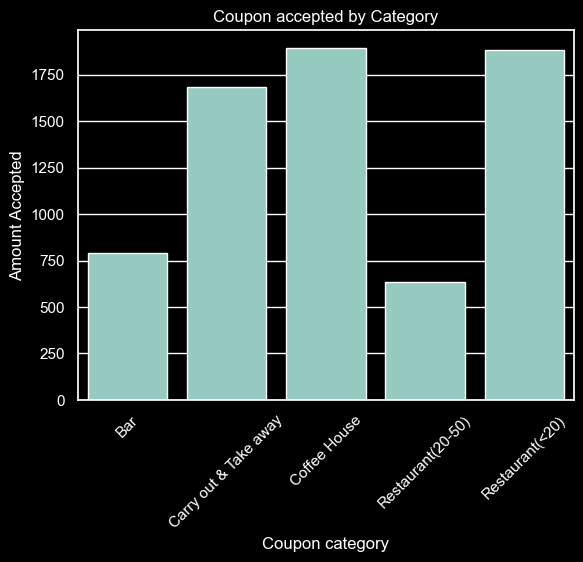

In [241]:
# Which coupon was accepted more?

coupon_accepted_count = working_data.query('Y == 1').groupby('coupon')['Y'].sum().reset_index()


# Plot result
sns.barplot(coupon_accepted_count, x='coupon', y = 'Y')
plt.xticks(rotation = 45)
plt.title("Coupon accepted by Category")
plt.xlabel("Coupon category")
plt.ylabel("Amount Accepted")
plt.show()


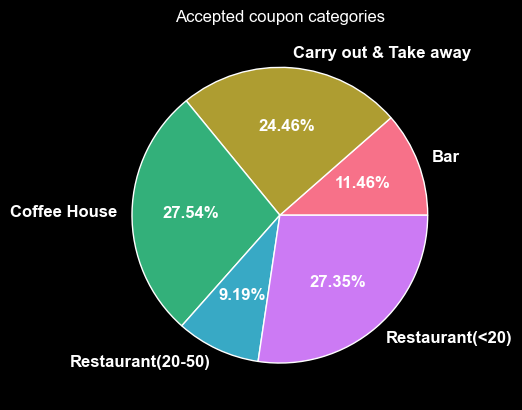

In [242]:
# Pie chart to compare categories
pie_data = coupon_accepted_count['Y']
plt.pie(pie_data, labels=coupon_accepted_count['coupon'], autopct='%1.2f%%', colors=sns.color_palette('husl', len(pie_data)),
        textprops={'color': 'white', 'fontsize': 12, 'weight': 'bold'})
plt.title("Accepted coupon categories")

plt.show()

In [243]:
# Now I'm interested in the three most accepted coupons by amount (Coffe House, restaurant(<20), and Carry out & Take away. These three coupons represent the 79.4% of accepted coupon.

# get top 3 coupons
top_3_coupons = coupon_accepted_count.sort_values(by='Y', ascending = False).head(3)['coupon'].values

# From top 3 coupons, get only the accepted
most_accepted_coupons = working_data.query('coupon in @top_3_coupons and Y == 1 ')

# Get the rate
most_accepted_coupons_rate = ( most_accepted_coupons.shape[0] / coupon_accepted_count['Y'].sum()) * 100

print(f"Most accepted coupon represent: {most_accepted_coupons_rate:.2f}%")



Most accepted coupon represent: 79.35%


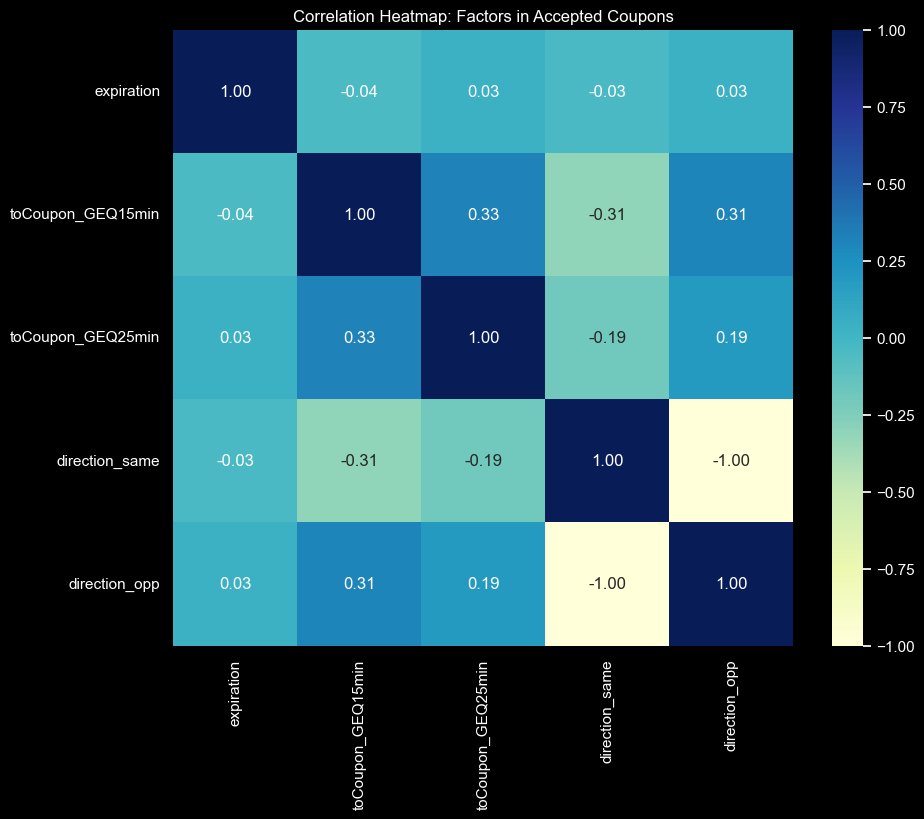

In [244]:
# Identify the common characteristics of the most accepted coupons.
most_accepted_coupons_numeric1 = working_data[[ 'expiration', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]


# most_accepted_coupons_numeric1 = most_accepted_coupons[correlation_cols].copy()

# Display a correlation heatmap to identify potential relationships
plt.figure(figsize=(10, 8))
sns.heatmap(most_accepted_coupons_numeric1.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap: Factors in Accepted Coupons")
plt.show()


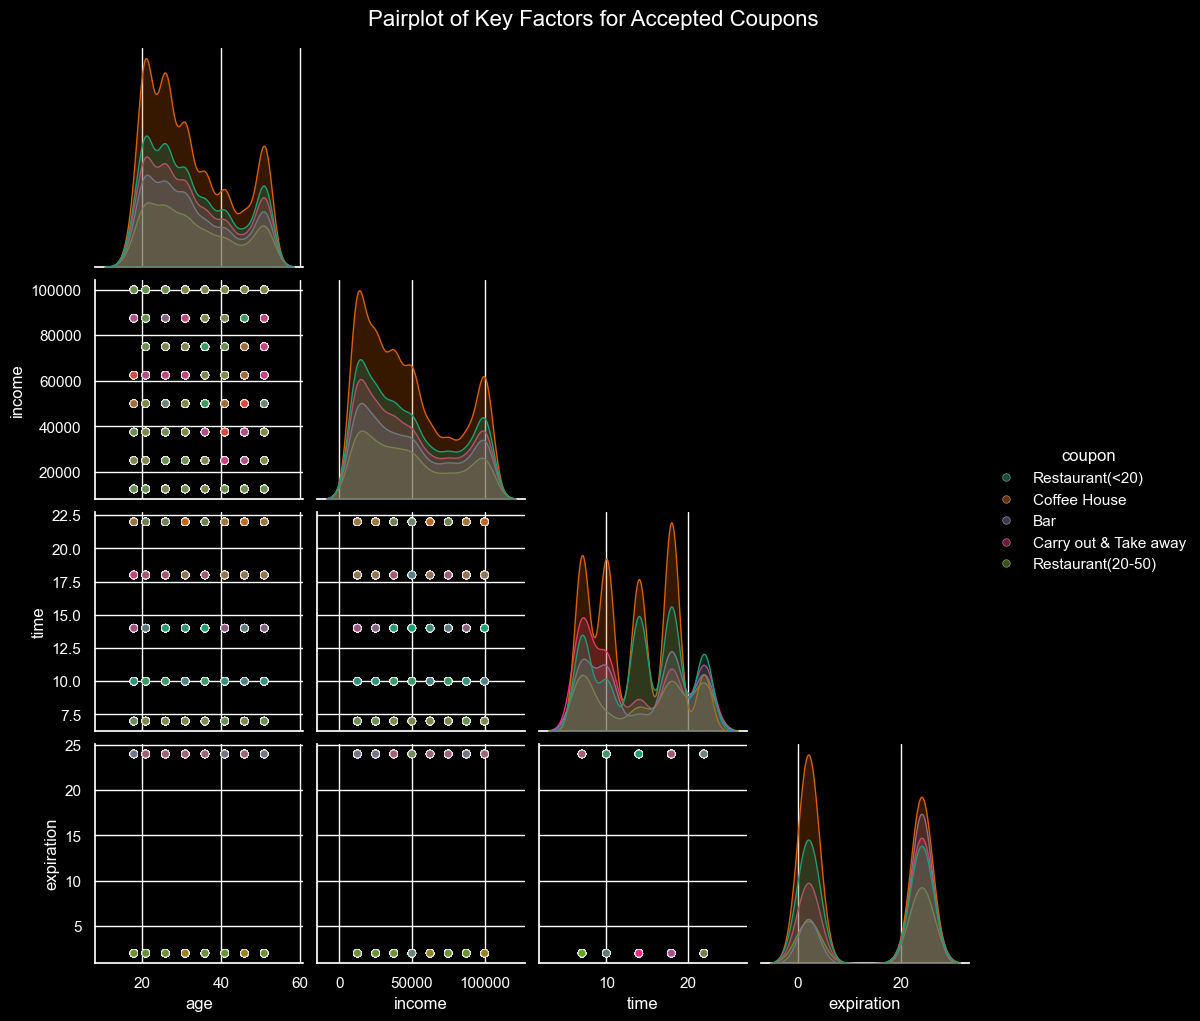

In [245]:
sns.pairplot(working_data[['age', 'income', 'time', 'expiration', 'coupon']],
                 hue='coupon',
                 diag_kind='kde',
                 palette='Dark2',
                 plot_kws={'alpha': 0.5, 's': 30, 'linewidth': 0.5},
                 corner=True)

plt.suptitle("Pairplot of Key Factors for Accepted Coupons", y=1.02, fontsize=16)
plt.show()


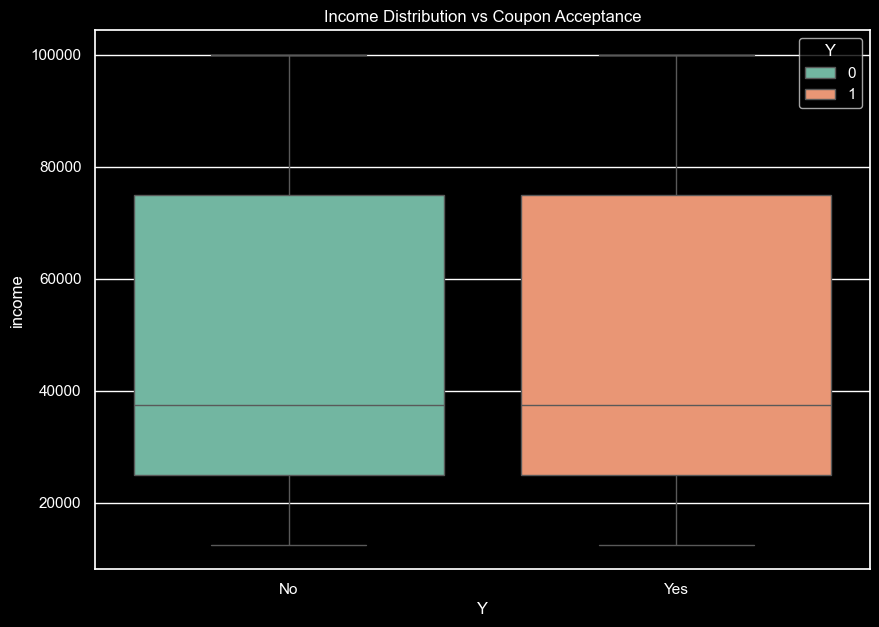

In [246]:
# 1. Box plot to see income distribution by coupon acceptance
plt.figure(figsize=(10, 7))
sns.boxplot(data=working_data, x='Y', y='income', hue='Y', palette='Set2')
plt.title('Income Distribution vs Coupon Acceptance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()




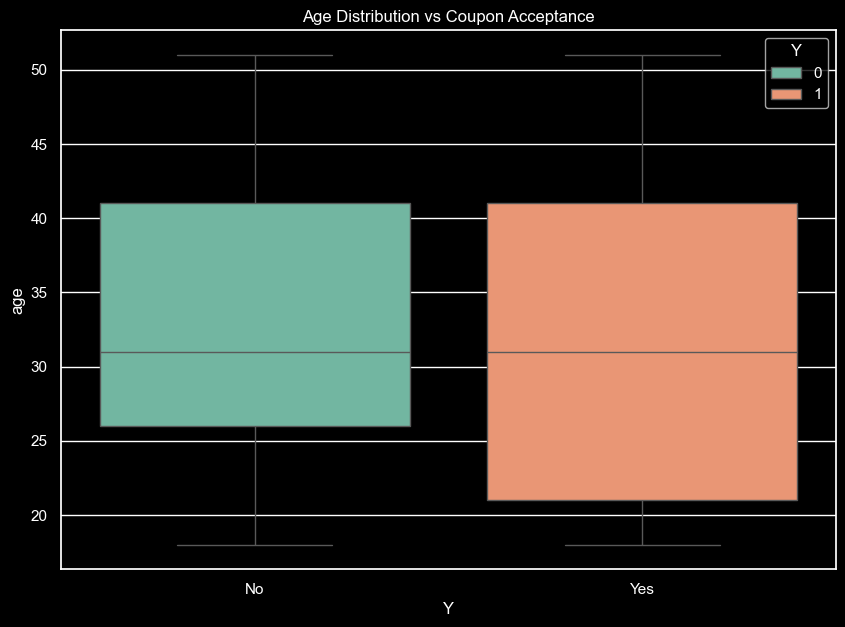

In [247]:
# Box plot to see income distribution by coupon acceptance
plt.figure(figsize=(10, 7))
sns.boxplot(data=working_data, x='Y', y='age', hue='Y', palette='Set2')
plt.title('Age Distribution vs Coupon Acceptance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


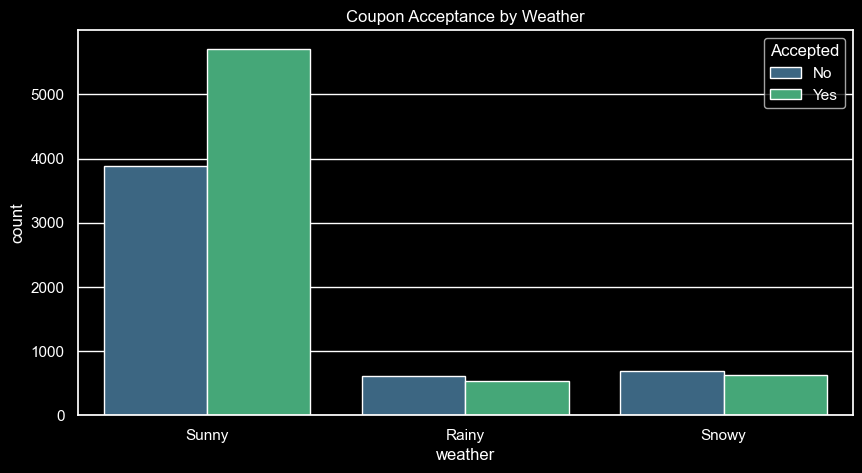

In [248]:
# Count plot to see acceptance across different weather conditions
plt.figure(figsize=(10, 5))
sns.countplot(data=working_data, x='weather', hue='Y', palette='viridis')
plt.title('Coupon Acceptance by Weather')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()



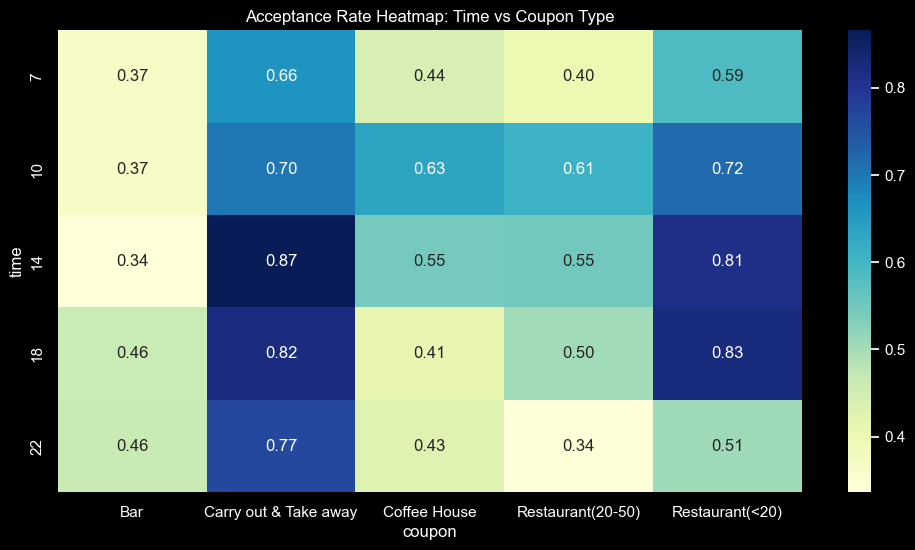

In [249]:
# Heatmap of acceptance rate by Time and Coupon Type
pivot_table = working_data.pivot_table(index='time', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Time vs Coupon Type')
plt.show()

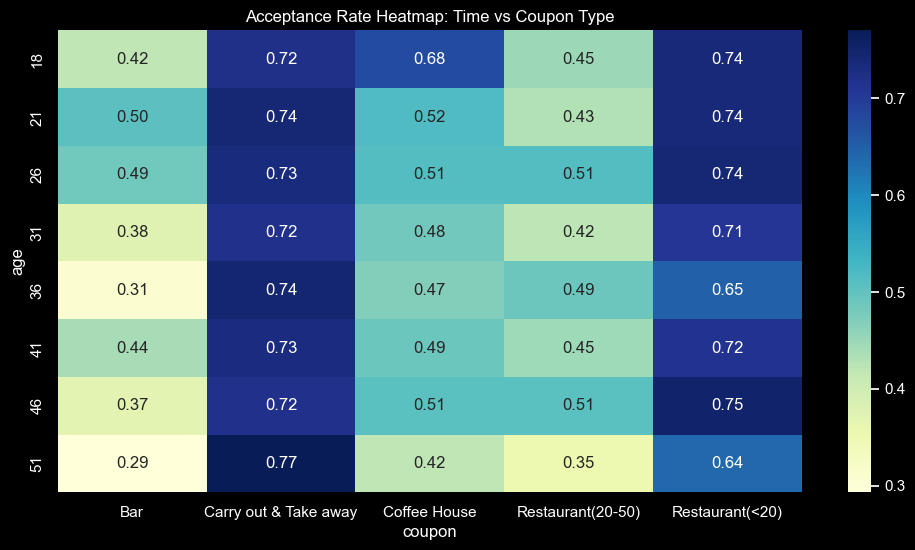

In [250]:
# Heatmap of acceptance rate by age and Coupon Type
pivot_table = working_data.pivot_table(index='age', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Time vs Coupon Type')
plt.show()

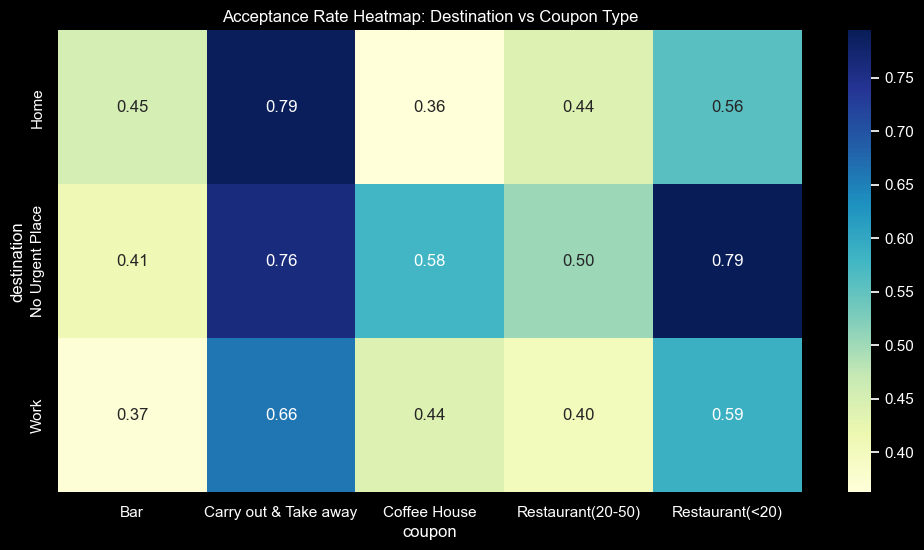

In [251]:
# Heatmap of acceptance rate by Destination and Coupon Type
pivot_table = working_data.pivot_table(index='destination', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Destination vs Coupon Type')
plt.show()

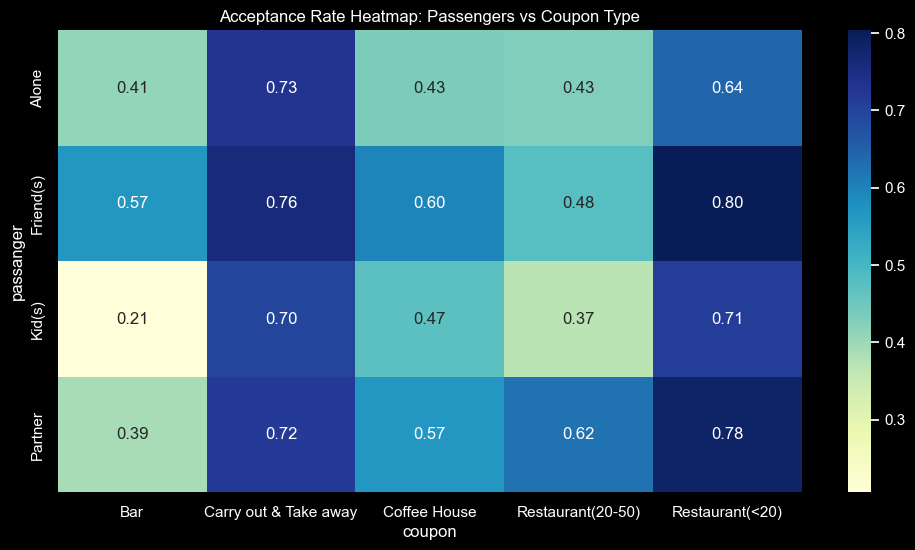

In [252]:
# Heatmap of acceptance rate by Pasengers and Coupon Type
pivot_table = working_data.pivot_table(index='passanger', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Passengers vs Coupon Type')
plt.show()

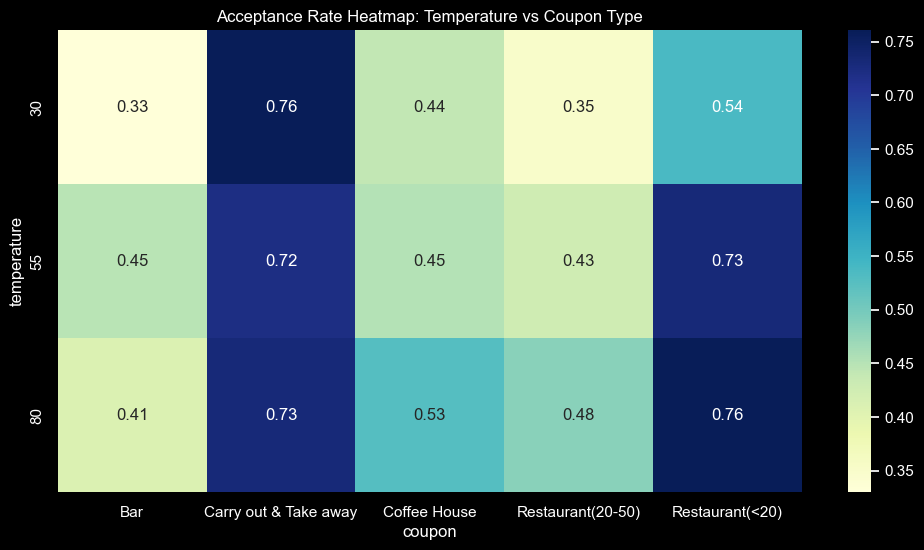

In [253]:
# Heatmap of acceptance rate by Temperature and Coupon Type
pivot_table = working_data.pivot_table(index='temperature', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Temperature vs Coupon Type')
plt.show()